In [68]:
import pandas as pd

df = pd.read_csv('heart_diseases.csv')

#checking for missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
#checking the datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [70]:
#summarizing the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [71]:
#selecting the cat columns and numerical colums
cat_cols = [col for col in df.columns if df[col].nunique() <= 10]
num_cols = df.drop(columns=cat_cols).columns.tolist()
print("num columns",num_cols)
print("cat columns", cat_cols)


num columns ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat columns ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


Outliers in age:
[]


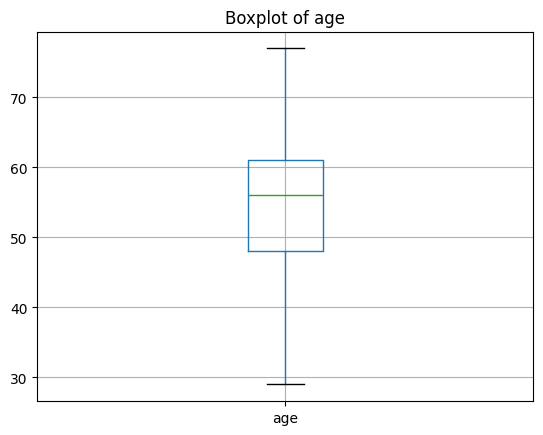

Outliers in trestbps:
[180 178 174 180 192 200 178 192 180 200 192 172 180 174 178 180 200 180
 178 180 178 174 180 200 172 180 178 178 172 180]


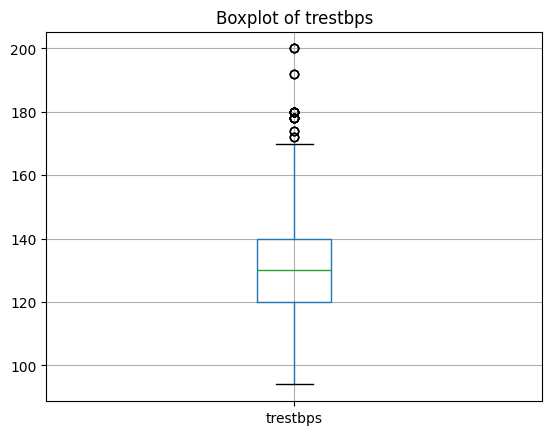

Outliers in chol:
[417 564 409 564 394 407 564 407 394 394 409 417 407 407 417 409]


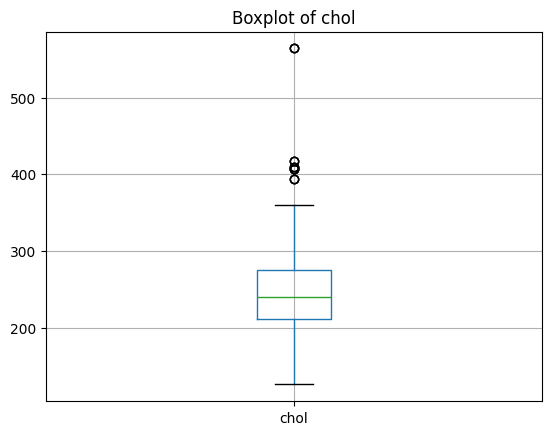

Outliers in thalach:
[71 71 71 71]


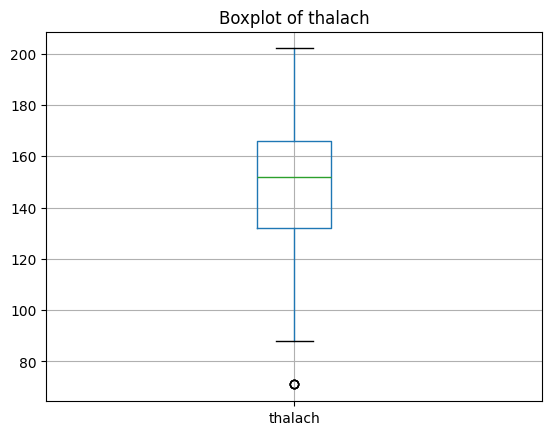

Outliers in oldpeak:
[5.6 5.6 6.2 6.2 6.2 5.6 5.6]


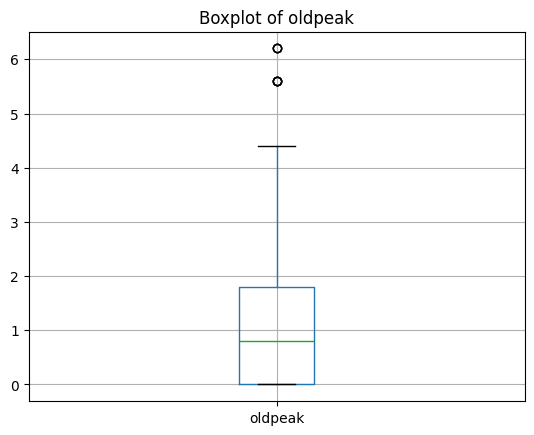

In [72]:
#finding the outliers in numerical columns
import matplotlib.pyplot as plt

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f'Outliers in {col}:')
    print(outliers.values)

    # Boxplot
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

Value counts for sex:
sex
1    713
0    312
Name: count, dtype: int64




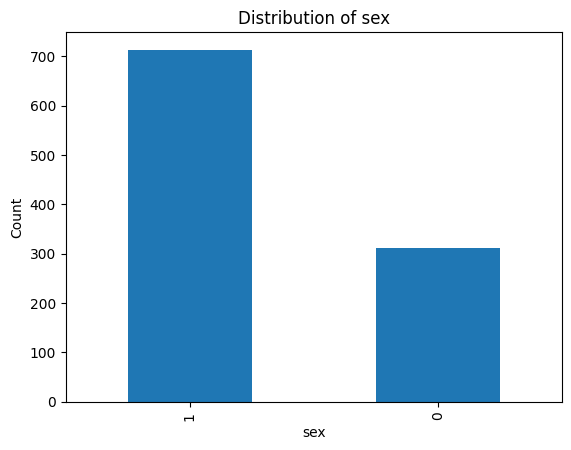

Value counts for cp:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64




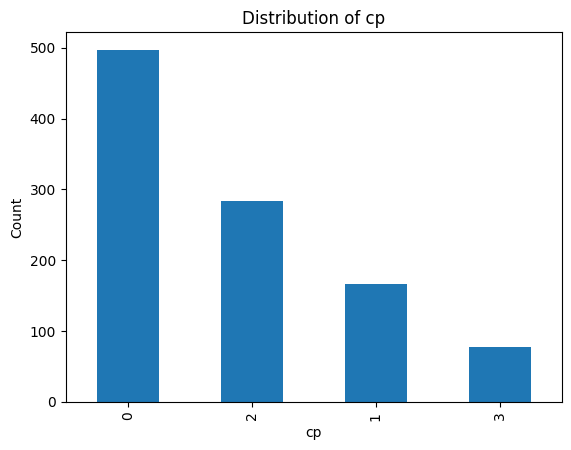

Value counts for fbs:
fbs
0    872
1    153
Name: count, dtype: int64




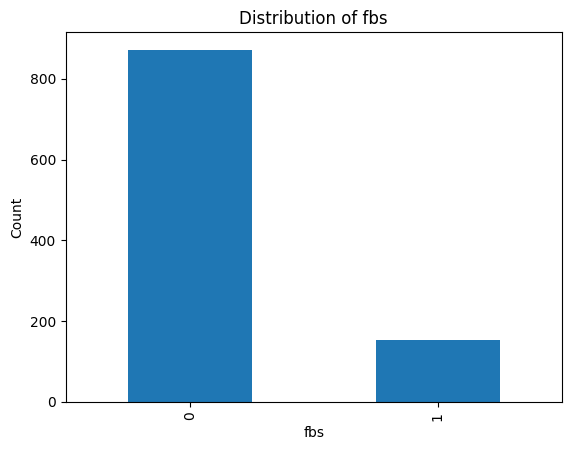

Value counts for restecg:
restecg
1    513
0    497
2     15
Name: count, dtype: int64




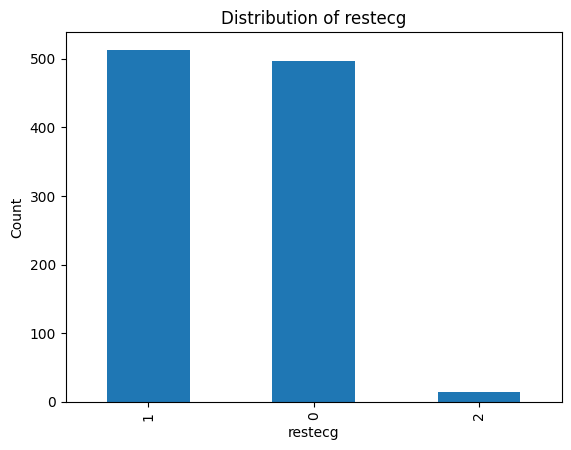

Value counts for exang:
exang
0    680
1    345
Name: count, dtype: int64




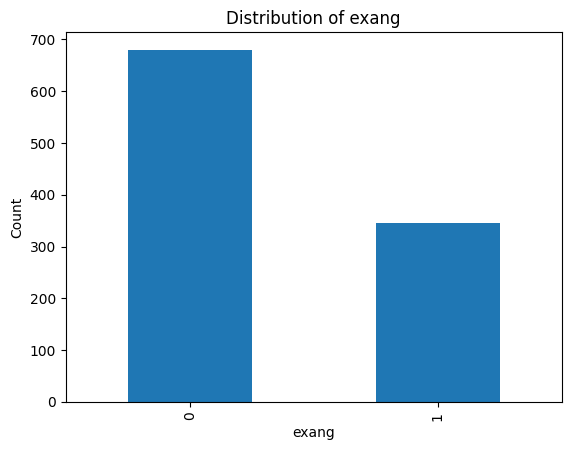

Value counts for slope:
slope
1    482
2    469
0     74
Name: count, dtype: int64




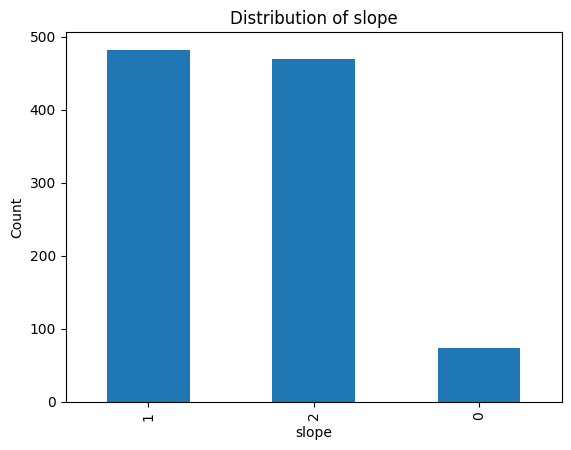

Value counts for ca:
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64




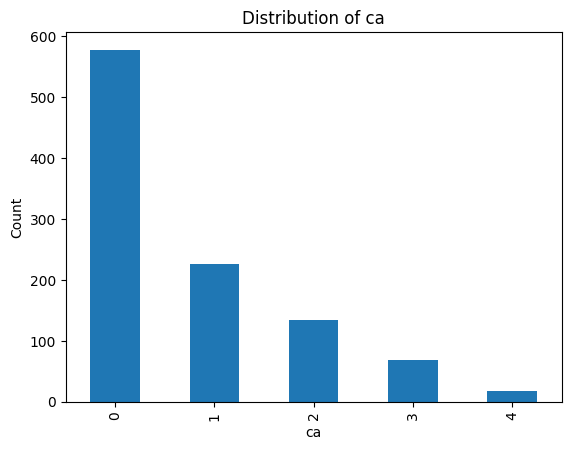

Value counts for thal:
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64




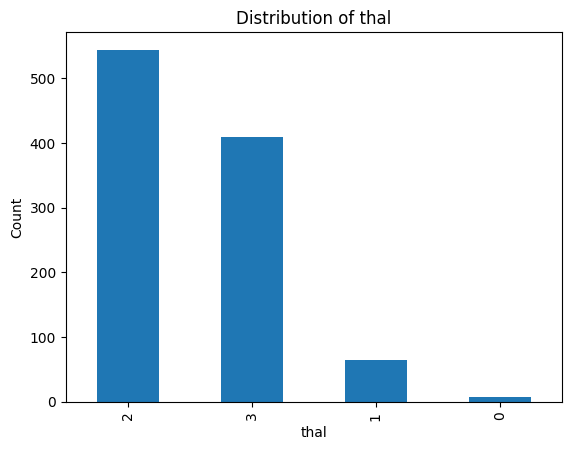

Value counts for target:
target
1    526
0    499
Name: count, dtype: int64




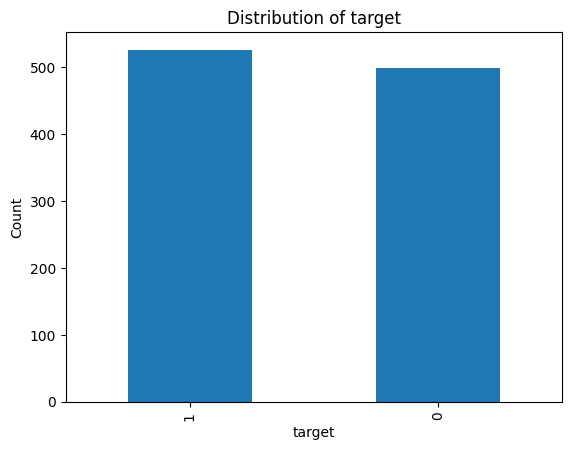

In [73]:
# Analyze the distribution of categorical variables
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [74]:
print(df.isnull().sum())
print("There are no missing values")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
There are no missing values


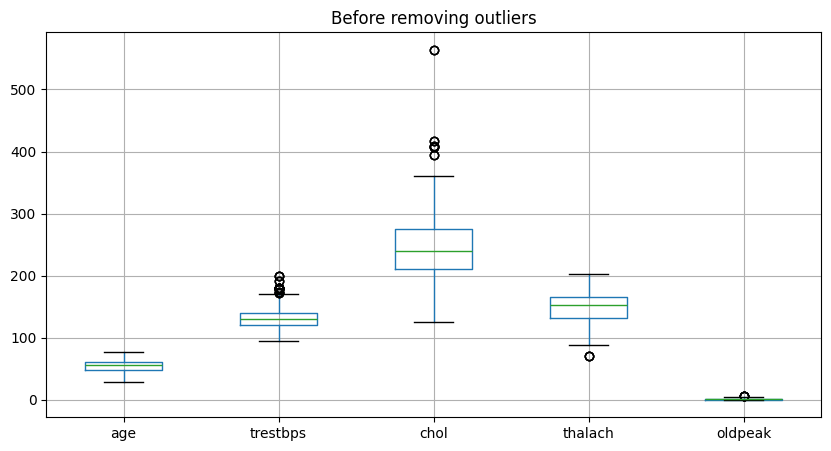

In [75]:
from scipy import stats

#plotting num_cols before removing outliers
plt.figure(figsize=(10, 5))
df[num_cols].boxplot()
plt.title("Before removing outliers")
plt.show()

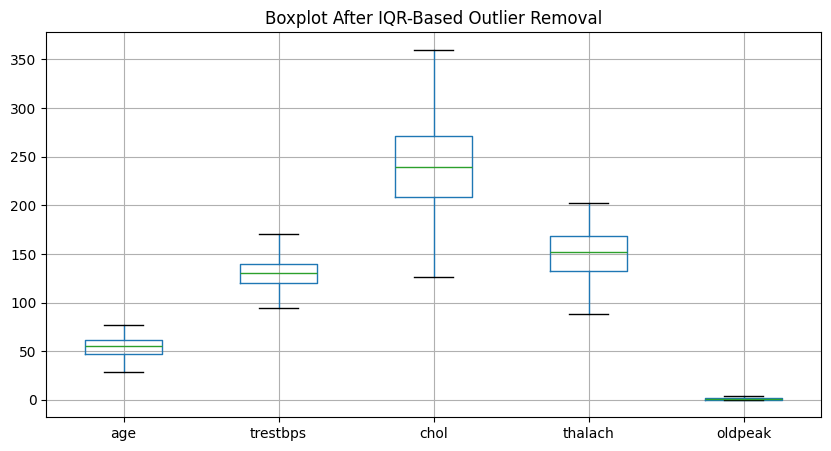

In [76]:
#removing the outliers using IQR method
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

plt.figure(figsize=(10, 5))
df_clean[num_cols].boxplot()
plt.title("Boxplot After IQR-Based Outlier Removal")
plt.show()


In [77]:
# One-hot encode multi-category variables: 'cp', 'restecg', 'thal'
one_hot_encoded = pd.get_dummies(df_clean, columns=['cp', 'restecg', 'thal'], drop_first=True)
one_hot_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,sex_bin,fbs_bin,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,...,1,0,False,False,False,True,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,...,1,1,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,...,1,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1,...,1,0,False,False,False,True,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,3,...,0,1,False,False,False,True,False,False,True,False


In [78]:
# Binary encoding for 'sex' and 'fbs' columns (already 0/1, but convert to bool for clarity)
df_clean['sex_bin'] = df_clean['sex'].astype(int)
df_clean['fbs_bin'] = df_clean['fbs'].astype(int)

df_clean[['sex_bin', 'fbs_bin']].head()

,sex_bin,fbs_bin
0,1,0
1,1,1
2,1,0
3,1,0
4,0,1


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

one_hot_encoded = df.copy()

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


scaled_df_reg = one_hot_encoded.copy()
scaler_reg = StandardScaler()
scaled_df_reg[num_cols] = scaler_reg.fit_transform(scaled_df_reg[num_cols])

y_reg = scaled_df_reg['chol']
X_reg = scaled_df_reg.drop('chol', axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

print("X_train_reg shape:", X_train_reg.shape)
print("y_train_reg shape:", y_train_reg.shape)



scaled_df_cls = one_hot_encoded.copy()
scaler_cls = StandardScaler()
scaled_df_cls[num_cols] = scaler_cls.fit_transform(scaled_df_cls[num_cols])

y_cls = scaled_df_cls['target']
X_cls = scaled_df_cls.drop('target', axis=1)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42)

print("X_train_cls shape:", X_train_cls.shape)
print("y_train_cls shape:", y_train_cls.shape)


X_train_reg shape: (820, 13)
y_train_reg shape: (820,)
X_train_cls shape: (820, 13)
y_train_cls shape: (820,)


In [ ]:
#creating the Regression models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg_models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Random Forest Regressor": RandomForestRegressor()
}

reg_results = []

for name, reg_model in reg_models.items():
    reg_model.fit(X_reg, y_reg)
    y_reg_pred = reg_model.predict(X_test_reg)
    
    mae = mean_absolute_error(y_test_reg, y_reg_pred)
    mse = mean_squared_error(y_test_reg, y_reg_pred)
    r2 = r2_score(y_test_reg, y_reg_pred)

    reg_results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "R2": r2
    })

pd.DataFrame(reg_results)
    
    
    


,Model,MAE,MSE,R2
0,Linear Regression,0.780966,1.149865,0.106505
1,Support Vector Regressor,0.557247,0.849521,0.339885
2,Random Forest Regressor,0.029644,0.001887,0.998534


In [85]:
#classification models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cls_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "KNNcls": KNeighborsClassifier()
}

cls_results = []

for name, cls_model in cls_models.items():
    cls_model.fit(X_cls, y_cls)
    y_cls_pred = cls_model.predict(X_test_cls)
    
    accuracy = accuracy_score(y_test_cls, y_cls_pred)
    precision = precision_score(y_test_cls, y_cls_pred)
    recall = recall_score(y_test_cls, y_cls_pred)
    f1 = f1_score(y_test_cls, y_cls_pred)

    cls_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })
    
pd.DataFrame(cls_results)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.809756,0.762295,0.902913,0.826667
1,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
2,KNNcls,1.000000,1.000000,1.000000,1.000000


In [86]:
# Summarize classification results
cls_results_df = pd.DataFrame(cls_results)
print("Classification Results:")
display(cls_results_df)

# Best classification model based on F1-Score
best_cls_model = cls_results_df.loc[cls_results_df['F1-Score'].idxmax()]
print(f"Best Classification Model: {best_cls_model['Model']} (F1-Score: {best_cls_model['F1-Score']:.3f})")

# Summarize regression results
reg_results_df = pd.DataFrame(reg_results)
print("Regression Results:")
display(reg_results_df)

# Best regression model based on R2 score
best_reg_model = reg_results_df.loc[reg_results_df['R2'].idxmax()]
print(f"Best Regression Model: {best_reg_model['Model']} (R2: {best_reg_model['R2']:.3f})")

Classification Results:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.809756,0.762295,0.902913,0.826667
1,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000
2,KNNcls,1.000000,1.000000,1.000000,1.000000


Best Classification Model: Random Forest Classifier (F1-Score: 1.000)
Regression Results:


,Model,MAE,MSE,R2
0,Linear Regression,0.780966,1.149865,0.106505
1,Support Vector Regressor,0.557247,0.849521,0.339885
2,Random Forest Regressor,0.029644,0.001887,0.998534


Best Regression Model: Random Forest Regressor (R2: 0.999)


In [93]:
import numpy as np

class CustomLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


X = X_train_reg.values
y = y_train_reg.values

model = CustomLinearRegression(lr=0.01, epochs=1000)
model.fit(X, y)
y_pred = model.predict(X_test_reg.values)

mse = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 1.2022038892027944
R² Score: 0.06583596323569807
